In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# Importando dados

Repare que vou importar também os dados da cotação do dólar. Posteriormente vou converter a cotação do Ethereum para reais, por isso que estou trazendo a cotação do dólar.

In [2]:
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA','FLMA11.SA','BOVA11.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA','ETH-USD','USDBRL=X']
     

In [3]:
inicio = '2020-05-01'
fim = '2021-08-24'

In [4]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Vamos converter a cotação do Ethereum para reais:

In [5]:
precos['ETH-BRL'] = precos['ETH-USD']*precos['USDBRL=X']

Agora podemos remover as colunas do Ethereum em dólares e da cotação do dólar

In [6]:
precos = precos.drop(columns=['ETH-USD', 'USDBRL=X'])

Vamos normalizar o preço dos ativos para visualizar seus desempenhos

In [7]:
normalizado = precos/precos.iloc[0]

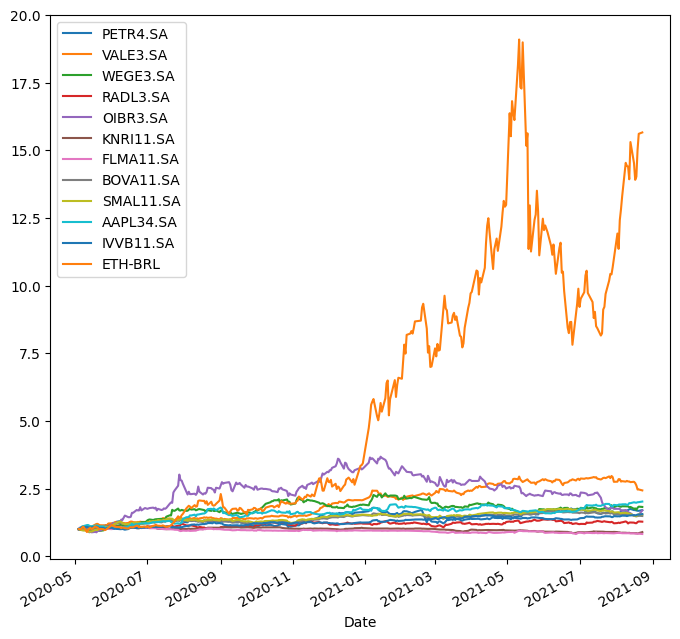

In [8]:
normalizado.plot(figsize = (8,8));

# Simulação de uma carteira fictícia

Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira

In [9]:
compras = {'PETR4.SA': 1000, 'VALE3.SA': 700, 'WEGE3.SA': 1500, 
           'RADL3.SA': 700, 'OIBR3.SA': 200, 'KNRI11.SA': 700, 'FLMA11.SA': 700, 'BOVA11.SA':1500,
           'SMAL11.SA': 1500, 'AAPL34.SA': 2000, 'IVVB11.SA': 1500, 
           'ETH-BRL': 200}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Quantidade total de ativos da nossa carteira?

In [11]:
sum(compras.values())

12200

Obtendo preços dos ativos no primeiro dia do investimento

In [12]:
primeiro = precos.iloc[0]

Quantidade de papéis comprados de cada ativo

In [13]:
qtd_acoes = compras_df/primeiro

Criando um dataframe que contém a posição diária de cada ativo

In [14]:
PL = precos*qtd_acoes
PL.head(3)

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000
2020-05-05,1032.221128,696.335032,1468.749654,696.987381,205.882353,702.685805,739.622529,1508.672847,1479.377360,2059.369077,1526.950431,200.962154
2020-05-06,994.246505,706.373800,1461.972567,693.037499,205.882353,717.231632,748.427554,1501.971061,1462.333842,2137.167359,1548.315577,199.662245


In [15]:
PL.tail()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2021-08-17,1703.360148,1892.936146,2648.266651,855.407562,300.000000,594.955302,586.282993,2234.231289,2217.361714,3962.566737,2256.649004,2781.549609
2021-08-18,1688.236116,1829.425517,2563.528439,852.039838,297.058824,595.134535,581.132010,2208.804201,2220.259080,3953.062095,2273.936211,2804.717612
2021-08-19,1678.783385,1725.048599,2686.436706,883.022975,300.000000,587.660097,583.333266,2224.375836,2275.309569,3985.575226,2308.422157,3002.797046
2021-08-20,1676.262327,1725.756189,2746.746656,898.177944,305.882353,596.566606,582.496847,2240.144622,2316.384508,3993.578279,2303.102954,3121.606584
2021-08-23,1702.730038,1701.873338,2729.187766,892.452812,338.235294,623.197168,573.867761,2228.318107,2316.213906,4037.096092,2332.358166,3131.866252


Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [16]:
PL['PL Total'] = PL.iloc[:].sum(axis = 1)
PL.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000,12200.000000
2020-05-05,1032.221128,696.335032,1468.749654,696.987381,205.882353,702.685805,739.622529,1508.672847,1479.377360,2059.369077,1526.950431,200.962154,12317.815751
2020-05-06,994.246505,706.373800,1461.972567,693.037499,205.882353,717.231632,748.427554,1501.971061,1462.333842,2137.167359,1548.315577,199.662245,12376.621993
2020-05-07,1003.452266,733.781044,1471.761963,694.175524,197.058824,716.112628,748.427554,1486.202425,1431.655459,2200.000077,1622.340455,212.823946,12517.792165
2020-05-08,1063.291141,778.397506,1439.758692,700.803467,202.941176,727.302014,726.414993,1526.215543,1433.359785,2220.109327,1602.393646,217.769114,12638.756403


In [17]:
PL.tail()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,
2021-08-17,1703.360148,1892.936146,2648.266651,855.407562,300.000000,594.955302,586.282993,2234.231289,2217.361714,3962.566737,2256.649004,2781.549609,22033.567155
2021-08-18,1688.236116,1829.425517,2563.528439,852.039838,297.058824,595.134535,581.132010,2208.804201,2220.259080,3953.062095,2273.936211,2804.717612,21867.334479
2021-08-19,1678.783385,1725.048599,2686.436706,883.022975,300.000000,587.660097,583.333266,2224.375836,2275.309569,3985.575226,2308.422157,3002.797046,22240.764861
2021-08-20,1676.262327,1725.756189,2746.746656,898.177944,305.882353,596.566606,582.496847,2240.144622,2316.384508,3993.578279,2303.102954,3121.606584,22506.705868
2021-08-23,1702.730038,1701.873338,2729.187766,892.452812,338.235294,623.197168,573.867761,2228.318107,2316.213906,4037.096092,2332.358166,3131.866252,22607.396700


# Obtendo dados do IBOV (ou outros benchmarks)

In [18]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%%**********************]  1 of 1 completed


In [19]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,80501.0,80502.0,77640.0,78876.0,78876.0,8594200
2020-05-05,78887.0,81066.0,78886.0,79471.0,79471.0,9154700
2020-05-06,79473.0,79996.0,78056.0,79064.0,79064.0,9775900
2020-05-07,79072.0,80061.0,78061.0,78119.0,78119.0,13808900
2020-05-08,78152.0,80557.0,78152.0,80263.0,80263.0,10734400


In [21]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)
ibov

,IBOV
Date,
2020-05-04,78876.0
2020-05-05,79471.0
2020-05-06,79064.0
2020-05-07,78119.0
2020-05-08,80263.0
...,...
2021-08-17,117904.0
2021-08-18,116643.0
2021-08-19,117165.0


Verificando se o índice dos dataframes está no formato 'data'

In [22]:
ibov.index = pd.to_datetime(ibov.index)
PL.index = pd.to_datetime(PL.index)

Juntando tudo num dataframe só

In [23]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')
novo_df.head()

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,,
2020-05-04,78876.0,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000,12200.000000
2020-05-05,79471.0,1032.221128,696.335032,1468.749654,696.987381,205.882353,702.685805,739.622529,1508.672847,1479.377360,2059.369077,1526.950431,200.962154,12317.815751
2020-05-06,79064.0,994.246505,706.373800,1461.972567,693.037499,205.882353,717.231632,748.427554,1501.971061,1462.333842,2137.167359,1548.315577,199.662245,12376.621993
2020-05-07,78119.0,1003.452266,733.781044,1471.761963,694.175524,197.058824,716.112628,748.427554,1486.202425,1431.655459,2200.000077,1622.340455,212.823946,12517.792165
2020-05-08,80263.0,1063.291141,778.397506,1439.758692,700.803467,202.941176,727.302014,726.414993,1526.215543,1433.359785,2220.109327,1602.393646,217.769114,12638.756403


Normalizando esse novo dataframe que contém o IBOV, todos os ativos e o PL da nossa carteira

In [24]:
PL_normalizado = novo_df/novo_df.iloc[0]
PL_normalizado.head()

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,,
2020-05-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-05,1.007543,1.032221,0.994764,0.979166,0.995696,1.029412,1.003837,1.056604,1.005782,0.986252,1.029685,1.017967,1.004811,1.009657
2020-05-06,1.002383,0.994247,1.009105,0.974648,0.990054,1.029412,1.024617,1.069182,1.001314,0.974889,1.068584,1.032210,0.998311,1.014477
2020-05-07,0.990403,1.003452,1.048259,0.981175,0.991679,0.985294,1.023018,1.069182,0.990802,0.954437,1.100000,1.081560,1.064120,1.026049
2020-05-08,1.017585,1.063291,1.111996,0.959839,1.001148,1.014706,1.039003,1.037736,1.017477,0.955573,1.110055,1.068262,1.088846,1.035964


In [25]:
PL_normalizado.tail()

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,,
2021-08-17,1.494802,1.703360,2.704194,1.765511,1.222011,1.500000,0.849936,0.837547,1.489488,1.478241,1.981283,1.504433,13.907748,1.806030
2021-08-18,1.478815,1.688236,2.613465,1.709019,1.217200,1.485294,0.850192,0.830189,1.472536,1.480173,1.976531,1.515957,14.023588,1.792404
2021-08-19,1.485433,1.678783,2.464355,1.790958,1.261461,1.500000,0.839514,0.833333,1.482917,1.516873,1.992788,1.538948,15.013985,1.823014
2021-08-20,1.496691,1.676262,2.465366,1.831164,1.283111,1.529412,0.852238,0.832138,1.493430,1.544256,1.996789,1.535402,15.608033,1.844812
2021-08-23,1.489325,1.702730,2.431248,1.819459,1.274933,1.691176,0.890282,0.819811,1.485545,1.544143,2.018548,1.554905,15.659331,1.853065


# Plot da nossa carteira vs. o IBOV

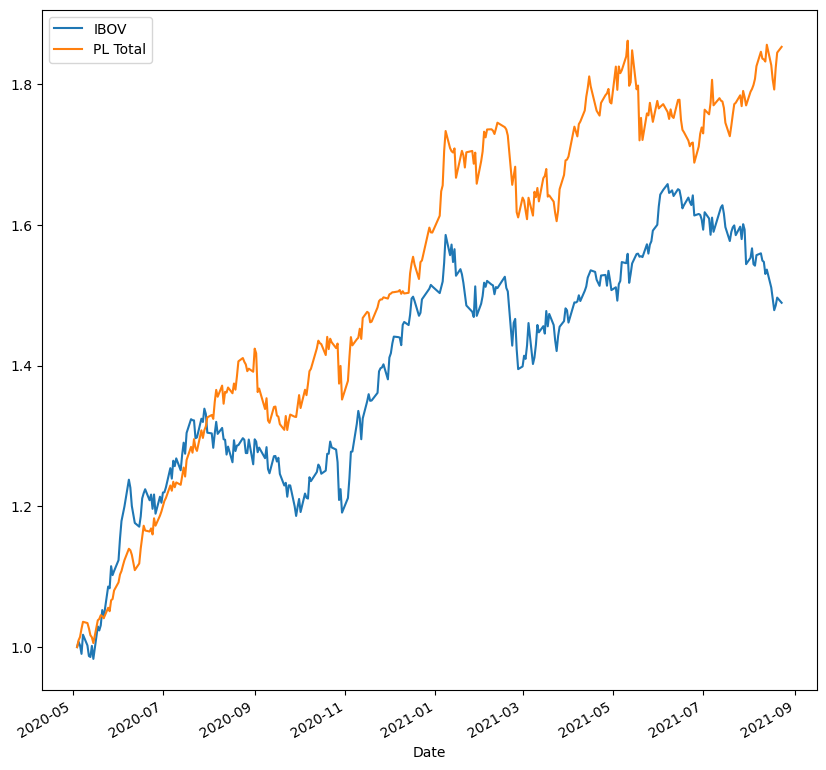

In [26]:
PL_normalizado[['IBOV', 'PL Total']].plot(figsize = (10,10));

## PERCENTUAL DE DIFERENÇA (Carteira X IBOV)

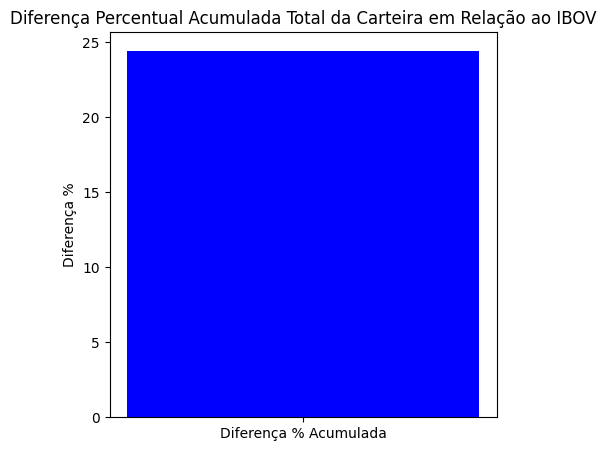

In [36]:
import matplotlib.pyplot as plt

# Calculando a diferença percentual acumulada
total_ibov = PL_normalizado['IBOV'].iloc[-1]
total_pl = PL_normalizado['PL Total'].iloc[-1]
diferenca_percentual = (total_pl - total_ibov) / total_ibov * 100

# Plotando o gráfico de colunas com a coluna mais fina
plt.figure(figsize=(5, 5))
plt.bar(['Diferença % Acumulada'], [diferenca_percentual], color='blue', width=0.1)  # Ajuste o valor de width conforme necessário
plt.title('Diferença Percentual Acumulada Total da Carteira em Relação ao IBOV')
plt.ylabel('Diferença %')
plt.show()
